# Problem Statement

Develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.
Some questions we want to ask in this module
How do I know if the dealer is offering fair value for my trade-in?
How do I know if I put a fair value on my car?



##### Submissions:
Use a jupyter notebook to submit.
Discuss your final findings for each of the tasks.
Use the helper functions provided to create plots and explain the corresponding visuals.
Clean your data adequately to minimise errors.
##### Learnings Expected:
Sampling data.
Model Hypothesis tests.
Model Evaluation using Plots
Tools and libraries:
LinearRegression from sklearn
Train test split or other sampling method
PolynomialFeatures from sklearn

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result

###### Setup

In [131]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing the cleaned data file from previous work and storing it into a pandas dataframe

In [132]:
data = pd.read_csv("Engineered_data")
data.head()  #It shows the tope five rows of the dataframe data

,Unnamed: 0,symboling,normalized-losses,make,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-L/100km,norm_length,norm_height,norm_width,doors_four,doors_two,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122.0,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,...,8.711667,0.811148,0.816054,0.890278,0,1,0,1,1,0
1,1,3,122.0,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,...,8.711667,0.811148,0.816054,0.890278,0,1,0,1,1,0
2,2,1,122.0,alfa-romero,hatchback,rwd,front,94.5,171.2,65.5,...,9.046731,0.822681,0.876254,0.909722,0,1,0,1,1,0
3,3,2,164.0,audi,sedan,fwd,front,99.8,176.6,66.2,...,7.840500,0.848630,0.908027,0.919444,1,0,0,1,1,0
4,4,2,164.0,audi,sedan,4wd,front,99.4,176.6,66.4,...,10.691591,0.848630,0.908027,0.922222,1,0,0,1,1,0


In [133]:
data.columns # looking for column names in the dataframe

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'norm_length', 'norm_height',
       'norm_width', 'doors_four', 'doors_two', 'diesel', 'gas',
       'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [134]:
#Droping the unwanted column 'Unnamed: 0' from the dataframe data
data.drop("Unnamed: 0", axis = 1, inplace=True)  

In [135]:
#Checking the data, now the unwanted column is removed form the data
data.head() 

,symboling,normalized-losses,make,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,highway-L/100km,norm_length,norm_height,norm_width,doors_four,doors_two,diesel,gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,48.8,...,8.711667,0.811148,0.816054,0.890278,0,1,0,1,1,0
1,3,122.0,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,48.8,...,8.711667,0.811148,0.816054,0.890278,0,1,0,1,1,0
2,1,122.0,alfa-romero,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,9.046731,0.822681,0.876254,0.909722,0,1,0,1,1,0
3,2,164.0,audi,sedan,fwd,front,99.8,176.6,66.2,54.3,...,7.840500,0.848630,0.908027,0.919444,1,0,0,1,1,0
4,2,164.0,audi,sedan,4wd,front,99.4,176.6,66.4,54.3,...,10.691591,0.848630,0.908027,0.922222,1,0,0,1,1,0


In [136]:
#Checking the datatypes of all the data
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
highway-L/100km      float64
norm_length          float64
norm_height          float64
norm_width           float64
doors_four             int64
doors_two              int64
diesel                 int64
gas                    int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object

In [137]:
#describe() provides the summary statistics of the data for numerical values like float64 or int64)
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,highway-L/100km,norm_length,norm_height,norm_width,doors_four,doors_two,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,...,8.052317,0.837102,0.899108,0.915126,0.572139,0.427861,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,...,1.842423,0.059213,0.040933,0.029187,0.496004,0.496004,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,4.355833,0.678039,0.799331,0.837500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,...,6.918088,0.801538,0.869565,0.890278,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,7.840500,0.832292,0.904682,0.909722,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,...,9.408600,0.881788,0.928094,0.925000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,14.700938,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
#To check the summary statistics of the non-numeric data use include=['object']
data.describe(include=['object'])

,make,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201
unique,22,5,3,2,6,7,8
top,toyota,sedan,fwd,front,ohc,four,mpfi
freq,32,94,118,198,145,157,92


## Task 1 - Univariate: Submit Wednesday
Using a simple linear function, select 1 variable/feature that has reasonable statistics as a predictor/independent variable (X) and the corresponding price feature as the target (Y). For your results, show the intercept and the coefficients and define the formula that will predict the price of the car using this feature.
Repeat this for a minimum of 4 features

### Sloution

Here will use Simple Linear Regression method to understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)


The result of Linear Regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable. 



 **Linear function:**
\begin{equation*}
Yhat = a + b  X
\end{equation*}

- a refers to the **intercept** of the regression, in other words: the value of Y when X is 0 
- b refers to the **slope** of the regression line, in other words: the value with which Y changes when X increases by 1.

#### Loading module for linear regression 

In [139]:
from sklearn.linear_model import LinearRegression

#### Create Linear regression object

In [140]:
# instantiate the Linear regression class
lm = LinearRegression()
lm

LinearRegression()

### 1. How could "engine size" helps to predict car price?

How "engine-size" can help to predict car price?
Using simple linear regression, creating a linear function with "engine-size" as the predictor variable and the "price" as the response variable.

In [141]:
# prepare your dependent and independent features
X = data[['engine-size']]
Y = data['price']

Fitting the linear regression model

In [142]:
lm.fit(X,Y)


LinearRegression()

 We can output a prediction 

In [143]:
# predict using our created model
Yhat = lm.predict(X)

# slice the prediction array
Yhat[0:5] 

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

#### Calculating the value of the intercept (a) 

In [144]:
#Calculating and storing intercept value into variable 'a'
a = lm.intercept_   
a

-7963.338906281049

#### Calculating the value of the Slope (b)

In [145]:
#Calculating and storing coefficient value into variable 'b'
b = lm.coef_
b

array([166.86001569])

#### Final estimated linear model for engine size 

**price** = -7963.33 + 166.86 x  **engine-size**

### 2. How could "curb-weight" helps to predict car price?

How "curb-weight" can help to predict car price?
Using simple linear regression, creating a linear function with "curb-weight" as the predictor variable and the "price" as the response variable.

In [146]:
# prepare your dependent and independent features
X = data[['curb-weight']]
Y = data['price']

Fitting the linear regression model

In [147]:
lm.fit(X,Y)

LinearRegression()

 We can output a prediction 

In [148]:
# predict using our created model
Yhat = lm.predict(X)

# slice the prediction array
Yhat[0:5] 

array([13108.85152621, 13108.85152621, 16634.03445191, 10404.07480868,
       16646.85329891])

#### Calculating the value of the intercept (a) 

In [149]:
#Calculating and storing intercept value into variable 'a'
a = lm.intercept_   
a

-19553.570636227483

#### Calculating the value of the Slope (b)

In [150]:
#Calculating and storing coefficient value into variable 'b'
b = lm.coef_
b

array([12.818847])

#### Final estimated linear model for engine size 


**price** = -19553.57. + 12.82 x  **curb-weight**

### 3. How could "stroke" helps to predict car price?

How "stroke" can help to predict car price?
Using simple linear regression, creating a linear function with "stroke" as the predictor variable and the "price" as the response variable.

In [151]:
# prepare your dependent and independent features
X = data[['stroke']]
Y = data['price']

Fitting the linear regression model

In [152]:
lm.fit(X,Y)

LinearRegression()

 We can output a prediction 

In [153]:
# predict using our created model
Yhat = lm.predict(X)

# slice the prediction array
Yhat[0:5] 

array([12013.76493222, 12013.76493222, 13648.01738591, 13503.21020647,
       13503.21020647])

#### Calculating the value of the intercept (a) 


In [154]:
#Calculating and storing intercept value into variable 'a'
a = lm.intercept_   
a

6469.718633642275

#### Calculating the value of the Slope (b)


In [155]:
#Calculating and storing coefficient value into variable 'b'
b = lm.coef_
b

array([2068.67399201])

#### Final estimated linear model for stroke 


**price** = 6469.71 + 2068.67 x  **stroke**

### 4. How could "bore" helps to predict car price?

How "bore" can help to predict car price?
Using simple linear regression, creating a linear function with "bore" as the predictor variable and the "price" as the response variable.

In [156]:
# prepare your dependent and independent features
X = data[['bore']]
Y = data['price']

Fitting the linear regression model

In [157]:
lm.fit(X,Y)

LinearRegression()

 We can output a prediction 

In [158]:
# predict using our created model
Yhat = lm.predict(X)

# slice the prediction array
Yhat[0:5] 

array([15450.27312826, 15450.27312826,  2729.69660162, 10941.71435932,
       10941.71435932])

#### Calculating the value of the intercept (a) 


In [159]:
#Calculating and storing intercept value into variable 'a'
a = lm.intercept_   
a

-40423.65161531275

#### Calculating the value of the Slope (b)

In [160]:
#Calculating and storing coefficient value into variable 'b'
b = lm.coef_
b

array([16101.99560333])

### Final estimated linear model for bore

**price** = -40423.65 + 16101.99 x  **bore**


## Task 2 - Multivariate: Submit Thursday
Expand Task 1 to multiple linear regression, select multiple variables/features (2 minimum) with reasonable statistics as predictors/independent variables X and the corresponding price feature as the target Y. Results: Show the coefficients and define the formula that will predict the price of the car using these features.


To use more variables in the model to predict car price, we can use **Multiple Linear Regression**.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and *two or more* predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We illustrate the structure by using four predictor variables, but these results can generalize to any integer :

 \begin{equation*}
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
\end{equation*}


\begin{equation*}
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
\end{equation*}


Equation used for Multiple Linear Regression

 \begin{equation*}
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4  + ...  +  b_n X_n
\end{equation*}

#### Creating a Multiple Linear Regression Model using two variables

Multiple Linear Regression model creation and training "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'. ?

In [161]:
Xtrain = data[['normalized-losses','highway-mpg']]

Fit the linear model using the two above-mentioned variables.

In [162]:
 lm.fit(Xtrain, data['price'])

LinearRegression()

Outputting the prediction

In [163]:
# predict using our created model
Yhat = lm.predict(Xtrain)

# slice the prediction array
Yhat[0:5] 

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

Calculating value of the intercept(a) for Multiple Linear Regression

In [164]:
lm.intercept_

38201.31327245728

Calculating values of the for coefficients  (b1, b2) for two variables.

In [165]:
lm.coef_

array([   1.49789586, -820.45434016])

#### Final estimated linear model using two variables

Equation for Two variables
\begin{equation*}
Yhat = a + b_1 X_1 + b_2 X_2 
\end{equation*}

Final Equation with values inserted.
**Price** = 38201.31327245728 + 1.49789586 x **normalized-losses** - 820.45434016 x **highway-mpg**

#### Creating a Multiple Linear Regression Model using four variables

From Task#1 We know what could be the predictor variables for car price Let use those for multiple linear regression

- engine-size
- curb-weight
- stroke
- bore


In [166]:
X_train = data[['engine-size','curb-weight','stroke','bore']]

Fit the linear model using the four above-mentioned variables.

In [167]:
 lm.fit(X_train, data['price'])

LinearRegression()

Outputting the prediction

In [168]:
# predict using our created model
Yhat = lm.predict(X_train)

# slice the prediction array
Yhat[0:5] 

array([14896.35711426, 14896.35711426, 17981.42867809,  9702.54015893,
       15575.9244831 ])

Calculating value of the intercept(a) for Multiple Linear Regression

In [169]:
lm.intercept_

-2401.687326219195

Calculating values of all the for coefficients (b1, b2, b3, b4).

In [170]:
lm.coef_

array([  117.83842001,     5.5272012 , -2701.9209356 , -1401.47282664])

#### Final estimated linear model for Multiple Linear Regression

**Price** = -2401.687326219195 + 117.83842001 x **engine-size** + 5.5272012 x **curb-weight** + -2701.9209356 x **stroke** + -1401.47282664 x **bore**

## Task 3 - Polynomial: Submit Friday
Expand Task 2 to polynomial regression. Raise the features to as many powers of your choosing and test if the relationship between the features and the target improves. Try this first with a single feature then expand to multiple features.
Evaluation:
Evaluate your models both using visuals and metrics.

### 2)  Model Evaluation using Visualization

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.


import the visualization package: seaborn


In [171]:

# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### Regression Plot


When it comes to simple linear regression, an excellent way to visualise the fit of our model is by using **regression plots**.

This plot will show a combination of a scattered data points (a **scatterplot**), as well as the fitted **linear regression** line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

 Let's visualize Horsepower as potential predictor variable of price:

(0.0, 48169.36890679431)

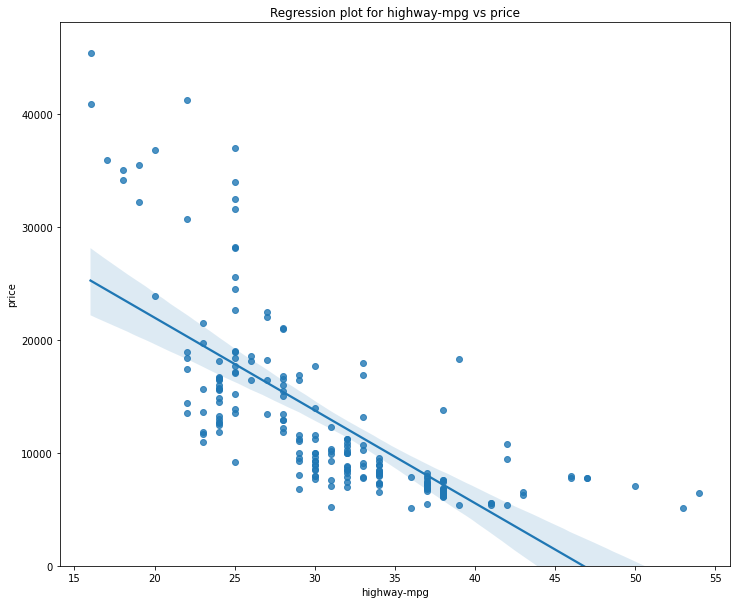

In [231]:

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=data)
plt.title('Regression plot for highway-mpg vs price')

plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".


(0.0, 47414.1)

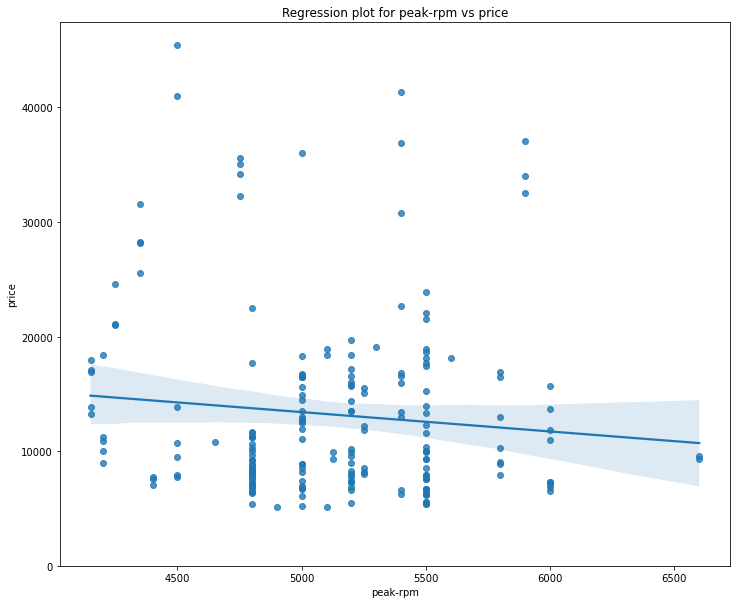

In [230]:

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=data)
plt.title('Regression plot for peak-rpm vs price')

plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" We see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm"  have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the  "highway-mpg"  increases.


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3: </h1>
<b> Given the regression plots above is "peak-rpm" or "highway-mpg"  more strongly correlated with "price". Use the method  ".corr()"  to verify your answer. </b>
</div>



 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q3" class="collapse">


 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q3" class="collapse">

 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q3" class="collapse">
```
The variable "peak-rpm"  has a stronger correlation with "price", it is approximate -0.704692  compared to   "highway-mpg" which is approximate     -0.101616. You can verify it using the following command:
df[["peak-rpm","highway-mpg","price"]].corr()
```
</div>


### Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a **residual**?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a **residual plot**?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are **randomly spread out around the x-axis**, then a **linear model is appropriate** for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.


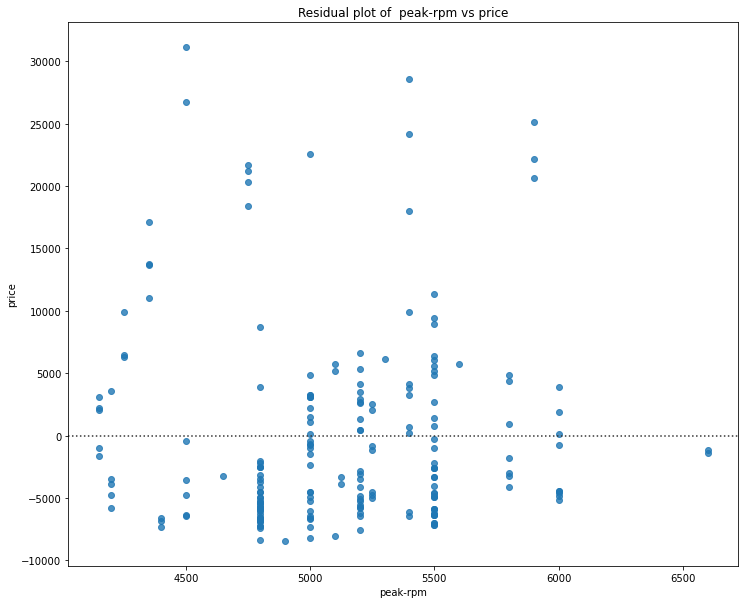

In [233]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x='peak-rpm', y='price', data=data)
#sns.residplot(data['highway-mpg'], data['price'])
plt.title('Residual plot of  peak-rpm vs price')

plt.show()


*What is this plot telling us?*

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.


###  Multiple Linear Regression


How do we visualise a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualise it with regression or residual plot. 

One way to look at the fit of the model is by looking at the **distribution plot**: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

 First lets make a prediction 


In [175]:

Y_hat = lm.predict(X_train)

plt.figure(figsize=(width, height))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

C:\Users\Hewlett - Packard\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hewlett - Packard\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


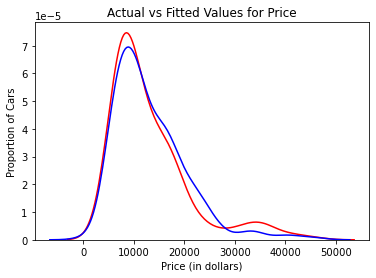

In [176]:
ax1 = sns.distplot(data['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.


## Part 3: Polynomial Regression Equations and Pipelines 


**Polynomial regression** is a particular case of the general linear regression model or multiple linear regression models. 
It provides the non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:


<center>**Quadratic - 2nd order**</center>



 \begin{equation*}
Yhat = a + b_1 X_1 +b_2 X_1^2 + b_3 X_2 + b_4 X_2^2 
\\
\end{equation*}



 <center>**Cubic - 3rd order**</center>

 \begin{equation*}
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\
\end{equation*}


<center> **Higher order**:</center>


 \begin{equation*}
Y = a + b_1 X +b_2 X^2 +b_3 X^3 + ... + b_n X_n^n\\
\end{equation*}



We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

 We will use the following function to plot the data:

In [249]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
print("done")

done


lets get the variables  


In [253]:
x = data['highway-mpg']
y = data['price']
print("done")


done


Let's fit the polynomial using the function **polyfit**, then use the function **poly1d** to display the polynomial function.


In [254]:


# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Let's plot the function 


AttributeError: 'AxesSubplot' object has no attribute 'set_axis_bgcolor'

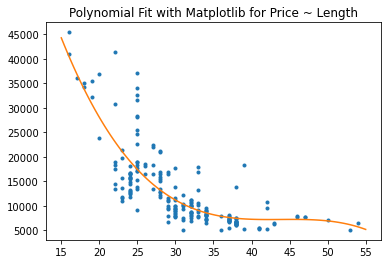

In [255]:
PlotPolly(p,x,y, data['highway-mpg'])

np.polyfit(x, y, 3)


We canalready see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.
 



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>
<b> Create  11 order polynomial model with the variables x and y from above?  </b>
</div>

 <div align="right">
<a href="#q4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q4" class="collapse">
```
# calculate polynomial
# Here we use a polynomial of the 3rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')
```
</div>

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


AttributeError: 'AxesSubplot' object has no attribute 'set_axis_bgcolor'

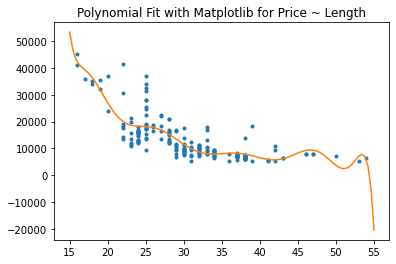

In [188]:
# calculate polynomial
# Here we use a polynomial of the 3rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:



\begin{equation*}
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
\end{equation*}


We can perform a polynomial transform on multiple features. First, we import the  module:



In [189]:
from sklearn.preprocessing import PolynomialFeatures


We create a **PolynomialFeatures** object of degree 2: 


In [190]:
# instantiate the polynomial features class
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [191]:
X_train_pr=pr.fit_transform(X_train)

The original data is of 201 samples and 4 features 

In [192]:
X_train.shape

(201, 4)

after the transformation, there 201 samples and 15 features


In [193]:
X_train_pr.shape

(201, 15)

## Pipeline 

Data Pipelines simplify the steps of processing the data. We use the module  **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline.


In [194]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor. 


In [195]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]



we input the list as an argument to the pipeline constructor 


In [196]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])



We can normalize the data,  perform a transform and fit the model simultaneously.

In [197]:
pipe.fit(X_train,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously


In [198]:
ypipe=pipe.predict(X_train)
ypipe[0:4]


array([15331.58857451, 15331.58857451, 12767.74444039,  9882.62761917])


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>
<b>  Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y  </b>
</div>



<div align="right">
<a href="#q5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q5" class="collapse">
```
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]
```
</div>

## Part 4: Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualise the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- **R^2 / R-squared**
- **Mean Squared Error (MSE)**

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.



**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).



### Model 1: Simple Linear Regression



Let's calculate the R^2

In [199]:

#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.29501777036720744

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [200]:
Yhat=lm.predict(X)
Yhat[0:4]


array([15450.27312826, 15450.27312826,  2729.69660162, 10941.71435932])

 lets import the function **mean_squared_error** from the module **metrics**



In [201]:
from sklearn.metrics import mean_squared_error

 we compare the predicted results with the actual results 


In [202]:


#mean_squared_error(Y_true, Y_predict)
mean_squared_error(data['price'], Yhat)


44302250.17369163


### Model 2: Multiple Linear Regression Euqation

Let's calculate the R^2

In [207]:
# fit the model 
lm.fit(X_train, data['price'])
# Find the R^2
lm.score(X_train, data['price'])

0.8030934661794138

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

 we produce a prediction 

In [208]:
Y_predict_multifit = lm.predict(X_train)


 we compare the predicted results with the actual results 


In [209]:
mean_squared_error(data['price'], Y_predict_multifit)


12373932.4985509


### Model 3: Polynomial Fit

Let's calculate the R^2

 let’s import the function **r2_score** from the module ** metrics** as we are using a different function  


In [210]:


from sklearn.metrics import r2_score

We apply the function to get the value of r^2

In [211]:

r_squared = r2_score(y, p(x))
r_squared

0.6741946663906513



We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

### MSE

 We can also calculate the MSE:  

mean_squared_error(df['price'], p(x)) 

## Part 5: Prediction and Decision Making
### Prediction

In the previous section, we trained the model using the method **fit**. Now we will use the method **predict** to produce a prediction.Lets import **pyplot** for plotting; we will also be using some functions from numpy. 
 




In [212]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 


Create a  new input

In [213]:
new_input=np.arange(1,100,1).reshape(-1,1)

 Fit the model 


In [214]:

lm.fit(X, Y)
lm

LinearRegression()

In [215]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\Hewlett - Packard\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-24321.65601198,  -8219.66040864,   7882.33519469,  23984.33079802,
        40086.32640136])

we can plot the data 

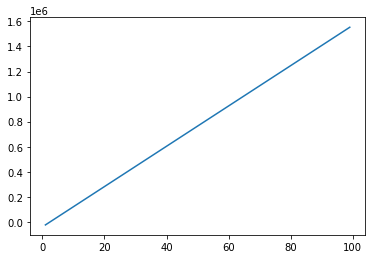

In [216]:

plt.plot(new_input,yhat)
plt.show()


### Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

- *What is a good R-squared value?*

When comparing models, **the model with the higher R-squared value is a better fit** for the data.


- *What is a good MSE?*

When comparing models, **the model with the smallest MSE value is a better fit** for the data.

#### Let's take a look at the values for the different models we get.


#### Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
- R-squared: 0.49659118843391759
- MSE: 3.16 x10^7


Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
- R-squared: 0.80896354913783497
- MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
- R-squared: 0.6741946663906514
- MSE: 2.05 x 10^7

### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2. 

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
 

- **MSE ** 
The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller. 


- **R-squared**: 
In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809). 

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

### Simple Linear Model (SLR) vs Polynomial Fit

- **MSE**: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR. 

- **R-squared**: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

### Multiple Linear Regression (MLR) vs Polynomial Fit

- **MSE**: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- **R-squared**: The R-squared for the MLR is also much larger than for the Polynomial Fit.

## Conclusion: 

Comparing these three models, we conclude that **the MLR model is the best model** to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price. 

kaggle

Produce a prediction 

In [229]:
# import linear regression
from sklearn.linear_model import LinearRegression
# instantiate the Linear regression class
lm = LinearRegression()
# prepare your dependent and independent features
X = data[['highway-mpg']]
Y = data['price']
#Fitting the linear regression model
lm.fit(X,Y)
# predict using our created model
Yhat = lm.predict(X)
#Calculating and storing intercept value into variable 'a'
a = lm.intercept_   
#Calculating and storing coefficient value into variable 'b'
b = lm.coef_


#### Final estimated linear model for engine size 
**price** = 38423.31 - 821.73 x  **highway-mpg**


The R-squared and MSE values help us to decide which model is a good model fit

-**The model with the higher R-squared value is a better fit** for the data.

-**The model with the smallest MSE value is a better fit** for the data.